In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
model = Sequential([    
    Dense(32, activation='relu', input_shape=(10,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy']
)

In [19]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 540us/step - loss: 0.6903 - acc: 0.5636 - val_loss: 0.6868 - val_acc: 0.5982
Epoch 2/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.6823 - acc: 0.5959 - val_loss: 0.6791 - val_acc: 0.6164
Epoch 3/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.6752 - acc: 0.6634 - val_loss: 0.6723 - val_acc: 0.6347
Epoch 4/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6694 - acc: 0.6947 - val_loss: 0.6670 - val_acc: 0.6849
Epoch 5/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.6647 - acc: 0.6937 - val_loss: 0.6624 - val_acc: 0.7169
Epoch 6/100
1022/1022 [==============================] - 0s 65us/step - loss: 0.6603 - acc: 0.7241 - val_loss: 0.6582 - val_acc: 0.7169
Epoch 7/100
1022/1022 [==============================] - 0s 74us/step - loss: 0.6562 - a

1022/1022 [==============================] - 0s 71us/step - loss: 0.3454 - acc: 0.8669 - val_loss: 0.3348 - val_acc: 0.8767
Epoch 59/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.3420 - acc: 0.8728 - val_loss: 0.3340 - val_acc: 0.8813
Epoch 60/100
1022/1022 [==============================] - ETA: 0s - loss: 0.3342 - acc: 0.873 - 0s 75us/step - loss: 0.3396 - acc: 0.8738 - val_loss: 0.3289 - val_acc: 0.8767
Epoch 61/100
1022/1022 [==============================] - 0s 71us/step - loss: 0.3370 - acc: 0.8738 - val_loss: 0.3262 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.3349 - acc: 0.8748 - val_loss: 0.3234 - val_acc: 0.8858
Epoch 63/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.3325 - acc: 0.8748 - val_loss: 0.3213 - val_acc: 0.8858
Epoch 64/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.3301 - acc: 0.8767 - val_loss: 0.3197 - val_acc: 0.8813
Epoch 65/100
102

In [20]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 23us/step


0.8858447477697782

In [21]:
import matplotlib.pyplot as plt

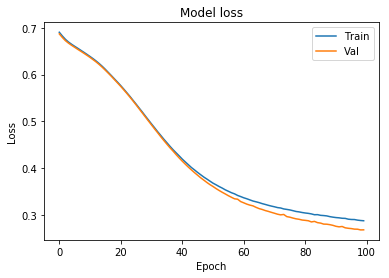

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

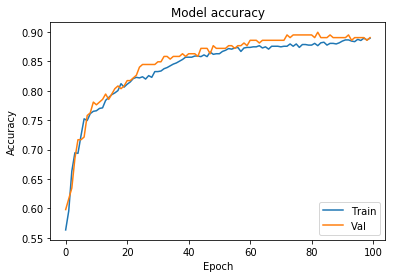

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
model_2 = Sequential([    
    Dense(1000, activation='relu', input_shape=(10,)),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1, activation='sigmoid')
])

In [27]:
model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy']
)

In [28]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4660 - acc: 0.7847 - val_loss: 0.3689 - val_acc: 0.8447
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3350 - acc: 0.8689 - val_loss: 0.2980 - val_acc: 0.8858
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3080 - acc: 0.8885 - val_loss: 0.2863 - val_acc: 0.8995
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2887 - acc: 0.8767 - val_loss: 0.3575 - val_acc: 0.8858
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2789 - acc: 0.8836 - val_loss: 0.2777 - val_acc: 0.8813
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2833 - acc: 0.8933 - val_loss: 0.2622 - val_acc: 0.9178
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2617 - acc: 0.8904 - val_loss: 0.2654 - val_acc: 0.8904
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1467 - acc: 0.9393 - val_loss: 0.4286 - val_acc: 0.9041
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1428 - acc: 0.9364 - val_loss: 0.4078 - val_acc: 0.8950
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1453 - acc: 0.9344 - val_loss: 0.4466 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1356 - acc: 0.9374 - val_loss: 0.5857 - val_acc: 0.8858
Epoch 65/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1688 - acc: 0.9237 - val_loss: 0.3781 - val_acc: 0.8904
Epoch 66/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1546 - acc: 0.9354 - val_loss: 0.4696 - val_acc: 0.8950
Epoch 67/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1617 - acc: 0.9217 - val_loss: 0.5392 - val_acc: 0.8858
Epoch 68/100
1022/1022 [========================

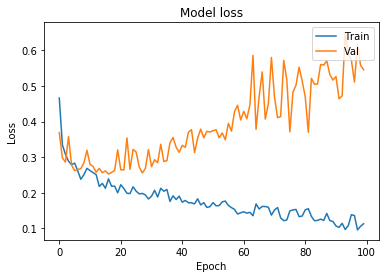

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

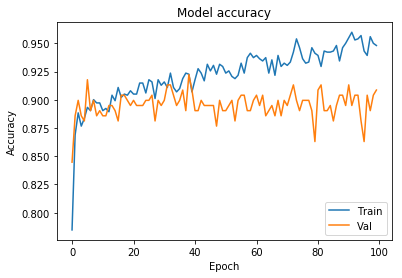

In [31]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()